# Introduction to Computer Vision using Tensorflow

Lets build a little bit more complicated application than this. Let's take a look at a scenario where we can recognize different items of clothing, trained from a dataset containing 10 different types.

![title](image_and_its_matrix.gif)

## Get Right Into Code:

In [1]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.0.0


The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:

In [2]:
mnist = tf.keras.datasets.fashion_mnist

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

What does these values look like? Let's print a training image, and a training label to see...Experiment with different indices in the array.



In [4]:
cv_data_idx = 110

8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 100 116 122 118 117 116 106 104 100  96  92  91  92  93  94
  106 109 111 107 113 105  98  96  50   0]
 [  0   0 166 233 209 227 224 220 218 218 218 217 216 224 231 230 231 231
  232 228 222 215 213 215 220 202 246  16]
 [  0   0 203 210 204 204 202 197 195 198 202 207 211 205 199 

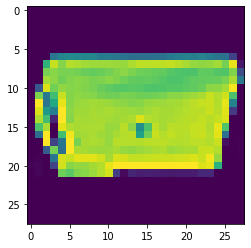

In [5]:
import matplotlib.pyplot as plt
plt.imshow(training_images[cv_data_idx])
print(training_labels[cv_data_idx])
print(training_images[cv_data_idx])

### Normalizing your Data

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called '**normalizing**'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [6]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

### Define and Training Neural Network

Lets build a simple Neural Network to solve this problem:

In [7]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now. 

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!





The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling *model.fit * asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like.

In [8]:
model.compile(optimizer = "Adam",
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 174us/sample - loss: 0.4662 - accuracy: 0.8302
Epoch 2/5
60000/60000 [==============================] - 10s 170us/sample - loss: 0.3570 - accuracy: 0.8676
Epoch 3/5
60000/60000 [==============================] - 9s 157us/sample - loss: 0.3223 - accuracy: 0.8803
Epoch 4/5
60000/60000 [==============================] - 9s 157us/sample - loss: 0.2985 - accuracy: 0.8875
Epoch 5/5
60000/60000 [==============================] - 11s 176us/sample - loss: 0.2786 - accuracy: 0.8956


### Evaluating your Model

We can call model.evaluate, and pass in the two sets, test_labels and test_images, and it will report back the loss for each.

In [9]:
model.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.33866742656230925, 0.8788]

### Introducing CallBacks

CallBacks are really important functions that can be called during your Training Cycle. They can be used for mutliple purpose and obsevre changes during your epochs. Lets define a callback that can stop our training when we achieve a specific Accuracy.

In [10]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.85):
      print("\nReached 85% accuracy so cancelling training!")
      self.model.stop_training = True


Callbacks are passed in the models fit method:

In [11]:
callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.4760 - accuracy: 0.8293
Epoch 2/10
59904/60000 [============================>.] - ETA: 0s - loss: 0.3569 - accuracy: 0.8690
Reached 85% accuracy so cancelling training!
60000/60000 [==============================] - 7s 119us/sample - loss: 0.3568 - accuracy: 0.8690


### Introducing Convolutional Neural Networks

Images are the form of a Spatial data. Instead of looking at each pixel of the image, we should look at a different patterns, edges and important features. Concolutions plays a very important here:

### Convolution Layer:

![title](images/convolution_layer_maths.png)

Effect on Convolution filter on an Image:

![title](images/effect_of_convolution_on_an_image.png)

### Pooling Layer:

![title](images/pooling_layer.png)

### Convilutional Neural Network using Tensorflow:

Tensorflow provides you with an API for a convolutional layer as well as a pooling layer. You can add it into your Feed-Forward Network:

In [12]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

2.0.0


In [13]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Model Summary

Model Summary is one of the most useful function of tensorflow. It tells you how each layer is connected and the information about learnable parameters:

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

#### Training and Evaluating Model

Lets train our deep convloutional neural network:

In [15]:
model.fit(training_images, training_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.4359 - accuracy: 0.8415
Epoch 2/5
60000/60000 [==============================] - 67s 1ms/sample - loss: 0.2944 - accuracy: 0.8916
Epoch 3/5
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.2494 - accuracy: 0.9077
Epoch 4/5
60000/60000 [==============================] - 57s 955us/sample - loss: 0.2174 - accuracy: 0.9186
Epoch 5/5
60000/60000 [==============================] - 59s 989us/sample - loss: 0.1892 - accuracy: 0.9284


In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(test_acc)

0.9065


## Visualizing the Convolutions and Pooling

This code will show us the convolutions graphically. The print (test_labels[;100]) shows us the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (9). They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the DNN is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

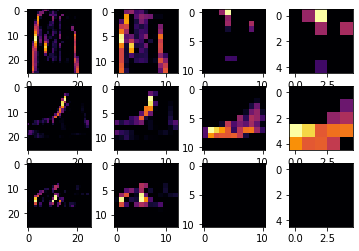

In [17]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)

FIRST_IMAGE=10
SECOND_IMAGE=43
THIRD_IMAGE=52
CONVOLUTION_NUMBER = 33

from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)